In [129]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [59]:
df=pd.read_csv('customer.csv')
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [60]:
df=df.drop(['Cust_Number'],axis=1)

# PAIR PLOT

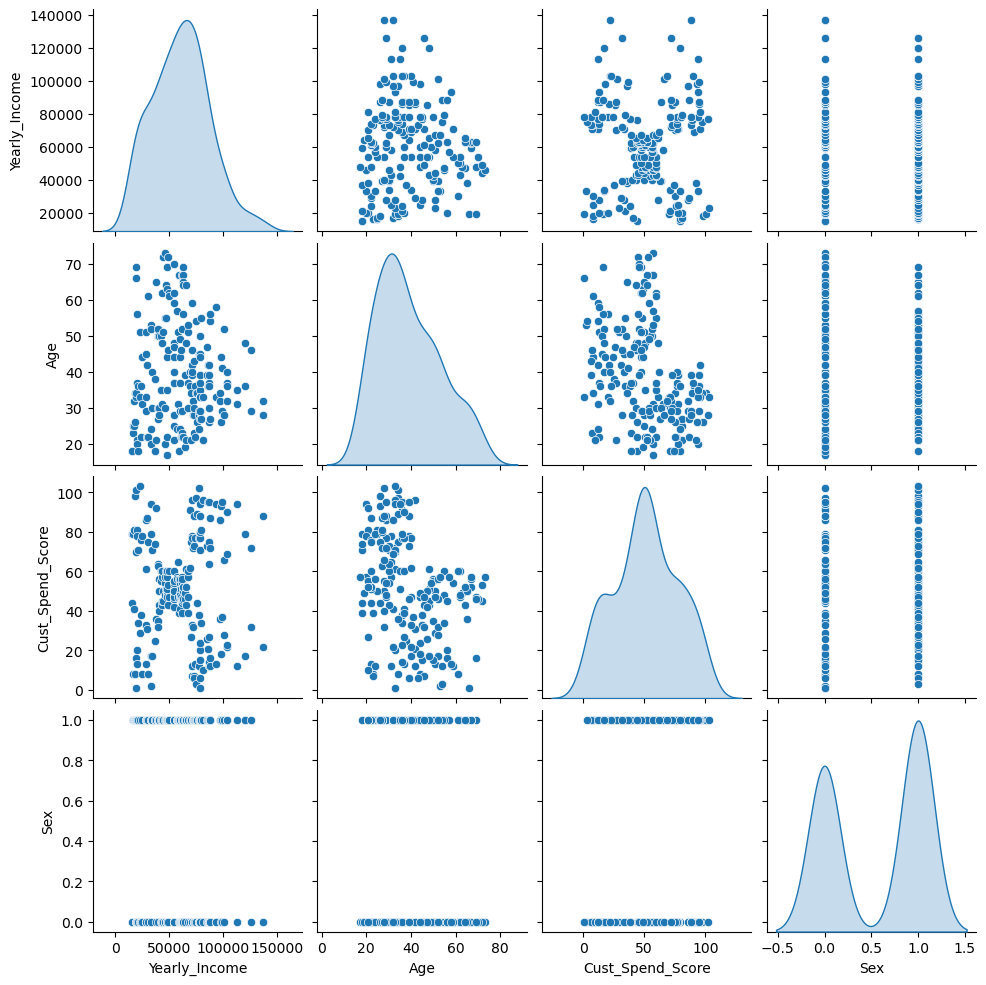

In [61]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [62]:
df_flt=df[['Yearly_Income','Cust_Spend_Score']]

In [63]:
df_flt.head()

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41


In [64]:
sc=StandardScaler()
df_sf=sc.fit_transform(df_flt)
df_sf=pd.DataFrame(df_sf,columns=df_flt.columns)
kmns=KMeans(n_clusters=5,random_state=10)
kmns.fit(df_sf)

KMeans(n_clusters=5, random_state=10)

In [65]:
print(kmns.cluster_centers_)
print(kmns.labels_)
print(kmns.inertia_)  #sum of squared distances of each data point in the input dataset to its assigned centroid
                      # in other words   -- is a measure of the sum of the within-cluster distances
print(kmns.init)      #method selects the initial centroids 'k-means++' (default) and second one is 'random' 
print(kmns.max_iter)
print(kmns.n_iter_)
print(kmns.n_clusters)

[[ 0.99158305  1.23437568]
 [-0.22414997 -0.00693126]
 [ 1.02054738 -1.24685589]
 [-1.30751869 -1.12631231]
 [-1.35366972  1.16441429]]
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
66.69647392440946
k-means++
300
3
5


In [66]:
df_sf

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702
...,...,...
195,2.268791,1.063563
196,2.497807,-0.746265
197,2.497807,0.794014
198,2.917671,-1.131335


In [67]:
df_final=df_sf.copy()

In [68]:
df_final.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


In [69]:
df_final['group']=kmns.fit_predict(df_sf)

In [70]:
df_final

,Yearly_Income,Cust_Spend_Score,group
0,-1.738999,-0.284181,3
1,-1.738999,1.063563,4
2,-1.700830,-1.670433,3
3,-1.700830,1.063563,4
4,-1.662660,-0.399702,3
...,...,...,...
195,2.268791,1.063563,0
196,2.497807,-0.746265,2
197,2.497807,0.794014,0
198,2.917671,-1.131335,2


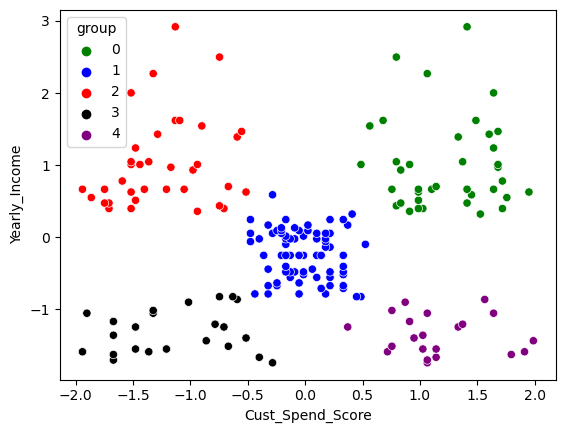

In [71]:
sns.scatterplot(y=df_final['Yearly_Income'],x=df_final['Cust_Spend_Score'],hue=df_final['group'],palette=['green','blue','red','black','purple'])
plt.show()

# ELBOW  PLOT 

In [82]:
Wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(df_sf)
    Wcss.append(kmeans.inertia_)

C:\Users\jainh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
wcss

[400.0000000000001,
 270.04127364864394,
 158.5731864827108,
 110.00511756050398,
 66.69647392440946,
 56.0162322660558,
 45.50439585313613,
 38.523388827463506,
 33.637660108974856,
 30.057274204203104,
 26.940984974011688,
 24.964467751508053,
 22.258399918028708,
 20.738411804026693,
 18.636919945398272,
 17.445382357079442,
 16.173221372993243,
 14.663724441856512,
 13.558449765517508,
 12.470763642004268]

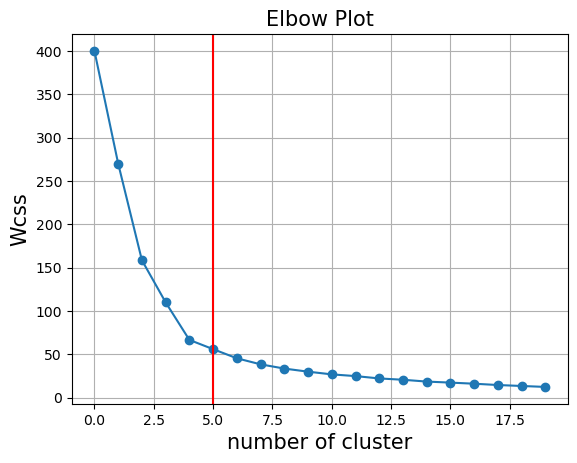

In [84]:
plt.plot(Wcss,marker='o')
plt.axvline(x=5,color='r')
plt.title('Elbow Plot',fontsize=15)
plt.xlabel('number of cluster',fontsize=15)
plt.ylabel('Wcss',fontsize=15)
plt.grid()
plt.show()

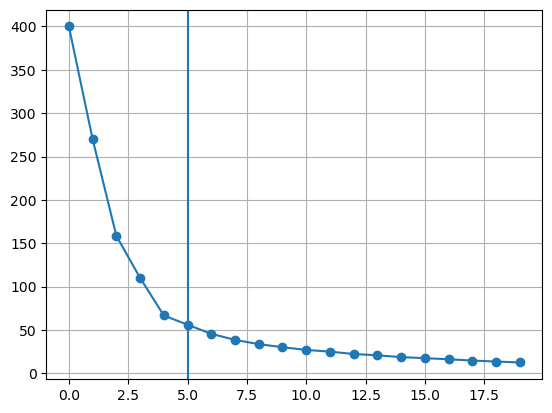

In [90]:
plt.plot(wcss,marker='o')
plt.axvline(x=5)
plt.grid()
plt.show()

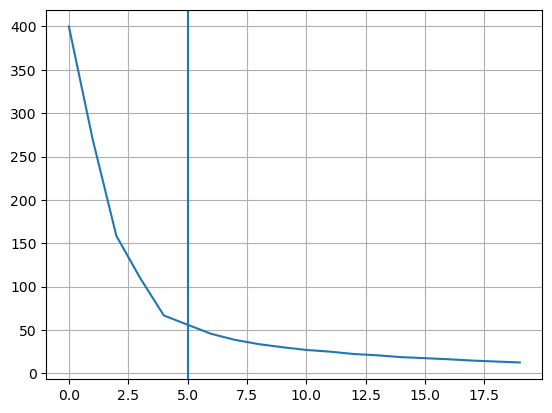

In [89]:
plt.plot(wcss)
plt.axvline(x=5)
plt.grid()
plt.show()

# SILHOUETTE SCORE

In [92]:
from sklearn.metrics import silhouette_score

In [116]:
for i in range(2,10):
    cluster=KMeans(n_clusters=i,random_state=10)
    predict=cluster.fit_predict(df_sf)
    scores=silhouette_score(df_sf,predict,random_state=10)
    scores=round(scores,2)
    print('for cluster {} silhouette score is {} ' .format(i,scores))

for cluster 2 silhouette score is 0.28 
for cluster 3 silhouette score is 0.47 
for cluster 4 silhouette score is 0.5 
for cluster 5 silhouette score is 0.55 
for cluster 6 silhouette score is 0.54 
for cluster 7 silhouette score is 0.53 
for cluster 8 silhouette score is 0.44 
for cluster 9 silhouette score is 0.45 


In [102]:
cluster=KMeans(n_clusters=5,random_state=10)
predict=cluster.fit_predict(df_sf)
score=silhouette_score(df_sf,predict,random_state=10)
print(score)

0.5520621436364275


In [104]:
n_clusters= [2,3,4,5,6,7,8,9,10]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_sf)
    score=silhouette_score(df_sf,predict,random_state=10)
    print('for {} cluster the silhouette score is {})' .format(k,score))

for 2 cluster the silhouette score is 0.2843143329836938)
for 3 cluster the silhouette score is 0.4655232553320422)
for 4 cluster the silhouette score is 0.4953283597895246)
for 5 cluster the silhouette score is 0.5520621436364275)
for 6 cluster the silhouette score is 0.5400545310397922)
for 7 cluster the silhouette score is 0.5301955242744942)
for 8 cluster the silhouette score is 0.4443127733448644)
for 9 cluster the silhouette score is 0.4481528622255642)
for 10 cluster the silhouette score is 0.44182843794466764)


In [118]:
from yellowbrick.cluster import SilhouetteVisualizer

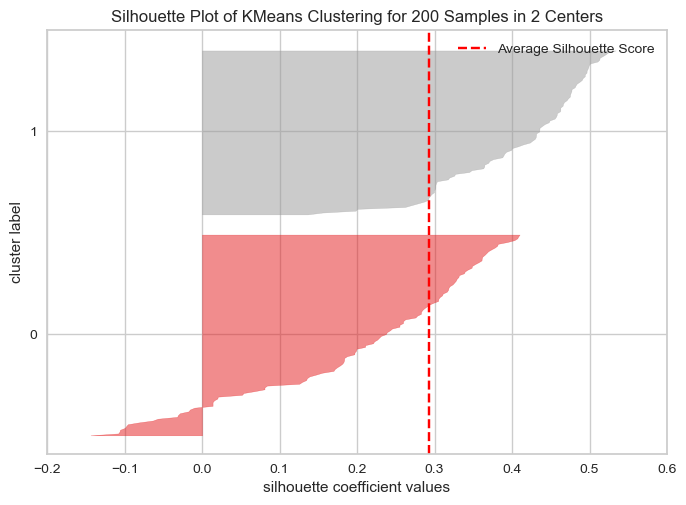

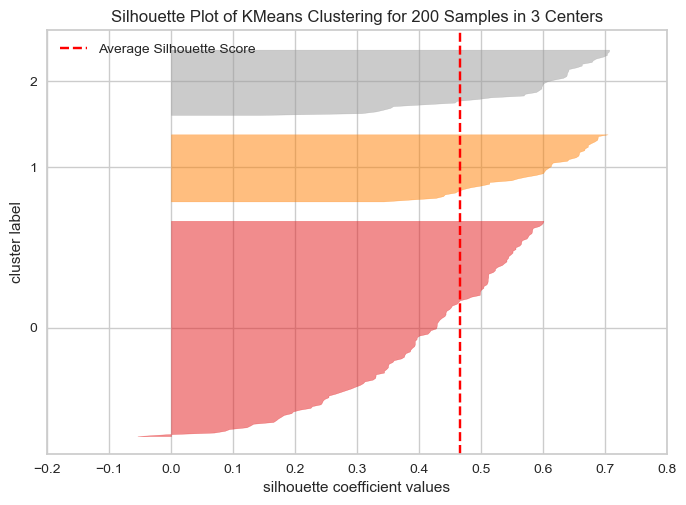

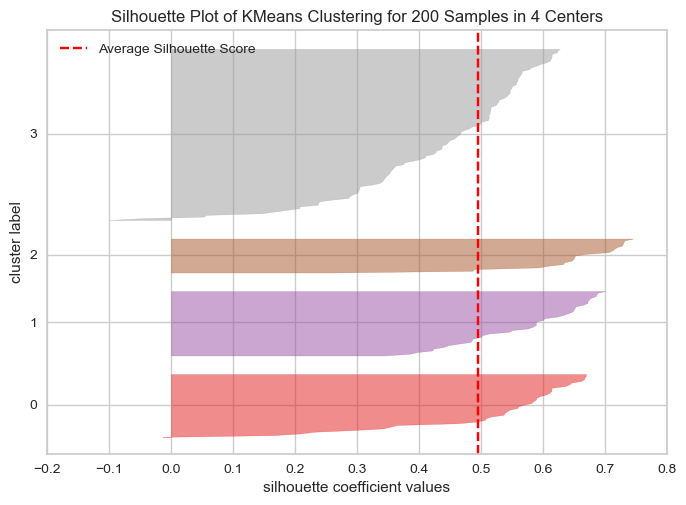

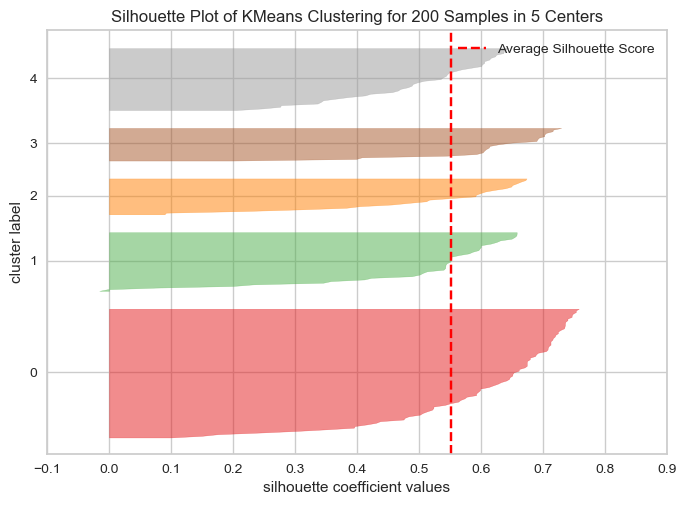

In [120]:
for i in range(2,6):
    kms=KMeans(n_clusters=i)
    kms.fit(df_sf)
    model= KMeans(n_clusters=i,random_state=42)
    visualizer= SilhouetteVisualizer(model)
    visualizer.fit(df_sf)
    visualizer.show()

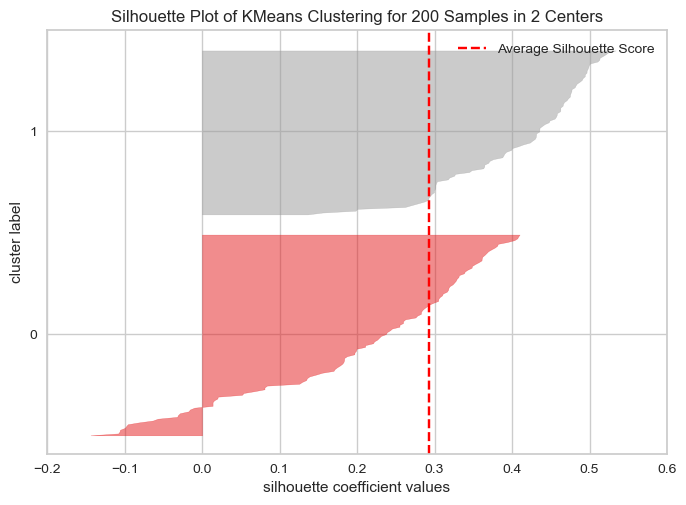

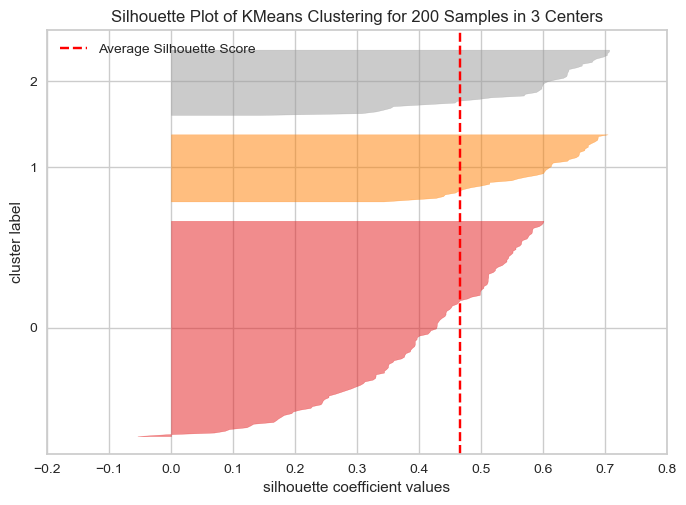

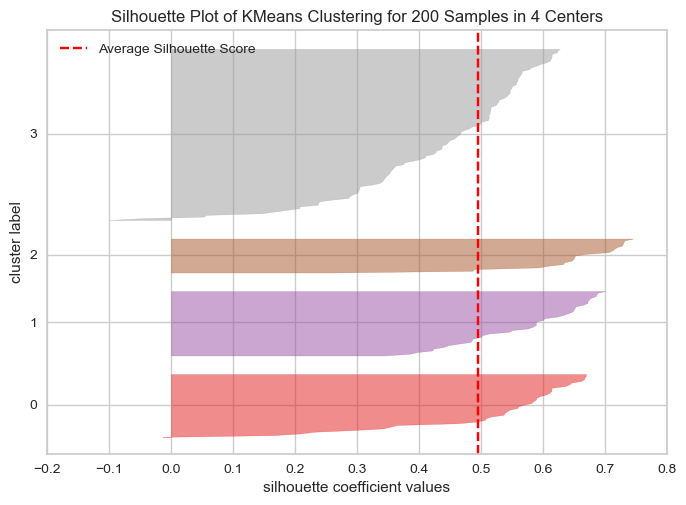

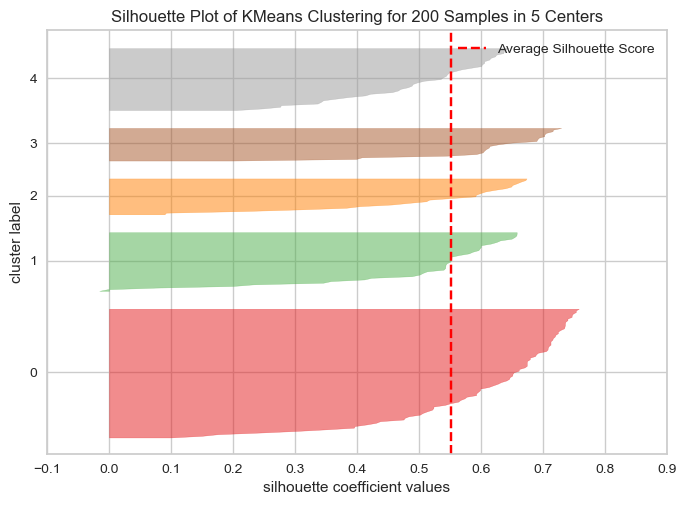

In [121]:
for i in range(2,6):
    model= KMeans(n_clusters=i,random_state=42)
    visualizer= SilhouetteVisualizer(model)
    visualizer.fit(df_sf)
    visualizer.show()

In [122]:
from sklearn import datasets
df1=datasets.load_iris()

In [123]:
df=pd.DataFrame(df1,columns=['sapal-length','sepal-width','petal-length','petal-width']) #  is not working thats why we have to
# do df1.data

In [124]:
df

,sapal-length,sepal-width,petal-length,petal-width


In [127]:
df1=df1.data

In [128]:
df2=pd.DataFrame(df1,columns=['sapal-length','sepal-width','petal-length','petal-width'])
df2

,sapal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [130]:
x_sc=sc.fit_transform(df2)

In [133]:
pca_iris=PCA().fit(x_sc)
pca_iris

PCA()

In [134]:
pca_iris.explained_variance_      # eigen value

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [135]:
pca_iris.components_          # eigen vectors

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])